# Multiindex Objects
- Single index -> one level of indexing
- Multiple index -> multiple levels of indexing
- Why multiple index?
    - Real world data is often multi-dimensional
    - More intuitive representation of data
    - Easier to perform operations on subsets of data
    - Better organization and hierarchy
- Can be used in both Series and DataFrame

In [1]:
import numpy as np
import pandas as pd

In [5]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([124,232,323,345,654,634,723,842],index=index_val)
a

(cse, 2019)    124
(cse, 2020)    232
(cse, 2021)    323
(cse, 2022)    345
(ece, 2019)    654
(ece, 2020)    634
(ece, 2021)    723
(ece, 2022)    842
dtype: int64

In [6]:
a['ece',2021]

np.int64(723)

### Problem with above approach ?
- Less intuitive representation of data (we have to remember the order of indices) .
- Hard to perform operations on subsets of data (we have to specify all the indices) .

In [ ]:
# Here if we try to fetch all the cse values , it throws an error because in this case we can't extract all the cse values directly since the indices depend on each other
a['cse']

### Solution
- We can use a `Multiindex series to solve this problem , it is also known as `Hierarchical Indexing` .
- A multiindex series allows us to have multiple levels of indexing in a single index object  , which makes it easier to perform operations on subsets of data and provides a more intuitive representation of the data.
- We can create a multiindex series using the pd.MultiIndex.from_tuples() or pd.MultiIndex.from_product() methods.

`NOTE :` to identify the dimension of an object we will check like how many values we have to provide in order to extract one particular value from that object .
- ex : in case of a 2D array we have to provide 2 values (row and column) to extract one particular value from that array .
 - also in multiindex series we have to provide 2 values (level 0 and level 1) to extract one particular value from that series , hence it is a 2D object .

## 1. `pd.MultiIndex.from_tuples()`
- Creates a multiindex object from a list of tuples, where first element of each tuple represents the first level of the index, second element represents the second level, and so on.
- We can access the levels of the multiindex object using the `levels` attribute.
- We can also access the individual levels of the multiindex object using indexing.

In [8]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [10]:
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

## 2. `pd.MultiIndex.from_product()`
- Creates a multiindex object from the cartesian product of multiple iterables.
- This method is useful when we want to create a multiindex object with all possible combinations of the levels.
- We can access the levels of the multiindex object using the `levels` attribute.
- We can also access the individual levels of the multiindex object using indexing.

In [11]:
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [12]:
# level inside multiindex object
multiindex.levels[1]

Index([2019, 2020, 2021, 2022], dtype='int64')

### Creating a series with multiindex object
- We can create a series with a multiindex object by passing the multiindex object as the index parameter while creating the series.
- We can then access the values in the series using the multi-level index.
- We can also use the `unstack()` and `stack()` methods to reshape the series.

In [43]:
s = pd.Series([123,232,133,434,523,623,237,238],index=multiindex )
s

cse  2019    123
     2020    232
     2021    133
     2022    434
ece  2019    523
     2020    623
     2021    237
     2022    238
dtype: int64

In [44]:
# how to fetch items from such a series
# multiple labels
s.loc[[('cse', 2020), ('ece', 2021)]]

cse  2020    232
ece  2021    237
dtype: int64

In [45]:
s['cse']

2019    123
2020    232
2021    133
2022    434
dtype: int64

## A logical question to ask ??
- since here we need 2 values to extract one particular value from this series so it is 2-D , then why not use a dataframe instead of multiindex series ?
- Answer : because multiindex series provides a more intuitive representation of the data and makes it easier to perform operations on subsets of data.
    - Also multiindex series can be easily reshaped using the unstack() and stack() methods.
    - These methods allow us to convert the multiindex series into a dataframe and vice versa, which can be useful for data analysis and visualization.

In [27]:
# unstack
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,123,232,133,434
ece,523,623,237,238


In [28]:
type(temp)

pandas.core.frame.DataFrame

In [31]:
# stack
x = temp.stack()
x

cse  2019    123
     2020    232
     2021    133
     2022    434
ece  2019    523
     2020    623
     2021    237
     2022    238
dtype: int64

In [32]:
type(x)

pandas.core.series.Series

### Then what was the point of multiindex series?
- its main usage is to represent a n dimensional data in a 2D or 1D format .

## multiindex dataframe

In [46]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

- this is a 3d object since we need 3 values (level 0 , level 1 and column) to extract one particular value from this dataframe .

In [50]:
branch_df1.loc['ece']

,avg_package,students
2019,9,10
2020,11,12
2021,13,14
2022,15,16


In [47]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

# Are columns really different from index?
- pandas at implementation level treats both index and columns as similar entities .
- since we just created a multiindex dataframe using multiindex object as index , then why not use multiindex object as columns ?
- let's see how to do that .

In [51]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [52]:
branch_df2['delhi']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [53]:
branch_df2['delhi']['avg_package']

2019    1
2020    3
2021    5
2022    7
Name: avg_package, dtype: int64

In [54]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [55]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

- this is a 4-D object since we need 4 values (level 0 , level 1 , column level 0 and column level 1) to extract one particular value from this dataframe .

In [60]:
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

### Stacking and Unstacking

In [61]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [62]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

- so here we converted a 3D object into a 2D object by unstacking it .
- internal index becomes internal columns and internal columns becomes external columns .

In [63]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

- so here we converted a 3D object into a 1D object by unstacking it twice .
- internal index becomes internal columns and internal columns becomes external columns .

In [65]:
# branch_df1.unstack().unstack().stack()
# 'Series' object has no attribute 'stack'

In [70]:
branch_df1.unstack().stack()

C:\Users\RITESH\AppData\Local\Temp\ipykernel_3492\2294027815.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack()


avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

- so here we converted a 2D object into a 3D object by stacking it once , the internal columns becomes internal index .

In [71]:
branch_df1.unstack().stack().stack()

C:\Users\RITESH\AppData\Local\Temp\ipykernel_3492\3704879661.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack().stack()


cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

- so here we converted a 1D object into a 3D object by stacking it twice , the internal columns becomes internal index and external columns becomes external index .

In [73]:
branch_df2.unstack()

delhi   avg_package  2019    1
                     2020    3
                     2021    5
                     2022    7
        students     2019    2
                     2020    4
                     2021    6
                     2022    8
mumbai  avg_package  2019    0
                     2020    0
                     2021    0
                     2022    0
        students     2019    0
                     2020    0
                     2021    0
                     2022    0
dtype: int64

In [74]:
branch_df2.stack()

C:\Users\RITESH\AppData\Local\Temp\ipykernel_3492\2650918455.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack()


delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [75]:
branch_df2.stack().stack()

C:\Users\RITESH\AppData\Local\Temp\ipykernel_3492\3351297655.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack()


2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64

- unstack means unstack the innermost index level by default and convert it into columns  ==> unstack increases the dimension of the object by 1  ==> unstacking the index in simple words .
- stack means stack the innermost column level by default and convert it into index ==> stack decreases the dimension of the object by 1 ==> stacking of index in simple words .

In [79]:
branch_df3.unstack()

delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0        0    0    0    0

In [80]:
branch_df3.stack()

C:\Users\RITESH\AppData\Local\Temp\ipykernel_3492\1686830926.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack()


delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [81]:
branch_df3.stack().stack()

C:\Users\RITESH\AppData\Local\Temp\ipykernel_3492\4037618427.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack()


cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

### Working with multiindex dataframes

In [82]:
# head and tail
branch_df3.head()
# shape
branch_df3.shape
# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [83]:
# Extracting rows single
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [84]:
# multiple
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [85]:
# using iloc
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [86]:
# Extracting cols
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [87]:
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [88]:
# Extracting both ( using fancy indexing)
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [90]:
# sort index
# both -> descending -> diff order
# based on one level
branch_df3.sort_index(ascending=False)  # this will sort both index levels in descending order .
branch_df3.sort_index(ascending=[False,True])   # this will sort level 0 in descending order and level 1 in ascending order .
branch_df3.sort_index(level=1,ascending=[False])    # this will sort level 1 in descending order .

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [92]:
# multiindex dataframe(col) -> transpose
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [95]:
# swaplevel
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [94]:
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Long Vs Wide Data
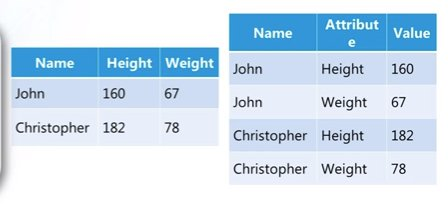

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

- Melt function converts wide format to long format.
- Pivot function converts long format to wide format.

In [97]:
# melt -> simple example branch
# wide to long
x = pd.DataFrame({'cse':[120]})
x

,cse
0,120


In [98]:
x.melt()

,variable,value
0,cse,120


In [110]:
# melt -> branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students').melt()


,variable,value
0,branch,cse
1,branch,ece
2,branch,mech
3,num_students,120
4,num_students,100
5,num_students,50


In [113]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')
# id_vars -> columns to be kept as it is
# var_name -> name of the new variable column
# value_name -> name of the new value column

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [114]:
# melt -> real world example
death = pd.read_csv('../DataSets/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('../DataSets/time_series_covid19_confirmed_global.csv')

In [115]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [116]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [118]:
death.shape

(289, 1081)

In [119]:
# creating a long format
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [120]:
death.head()

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [121]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

,Country/Region,date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


### Pivot Table

- The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = sns.load_dataset('tips')   # here tips is a toy dataset .
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Q : What is the average total_bill paid by male and female customers ?
df.groupby('sex')[['total_bill']].mean()

C:\Users\RITESH\AppData\Local\Temp\ipykernel_5004\721421338.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [10]:
# Q : What is the average total_bill paid by smokers and non-smokers ?
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

C:\Users\RITESH\AppData\Local\Temp\ipykernel_5004\2502940247.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [11]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')

C:\Users\RITESH\AppData\Local\Temp\ipykernel_5004\3095103609.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


- Here index is rows and columns is columns and values is the values to be filled in the table .
- The default aggfunc is mean  we can change it to other functions like sum , std , count , min , max etc .
- We can also use multiple functions at a time .
- We can also use multiple columns at a time .
- We can also use margins = True to get the total values for rows and columns .

In [12]:
# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

C:\Users\RITESH\AppData\Local\Temp\ipykernel_5004\2738203784.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')


smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [27]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],margins=True)
# here margins = True gives the total values for rows and columns .

C:\Users\RITESH\AppData\Local\Temp\ipykernel_5004\3067188775.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],margins=True)


size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                              tip                   ...                      \
day                 All      Thur              Fri  ...       Sat       Sun   
time                        Lunch Dinner     Lunch  ...    Dinner    Dinner   
sex    smoker                                       ...                       
Male   Yes     2.500000  3.058000    NaN  1.900000  ...  2.879259  3.521333   
       No      2.711340  2.941500    NaN       NaN  ...  3.256563  3.115349   
Female Yes     2.242424  2.990000    NaN  2.660000  ...  2.868667  3.500000   
       No      2.592593  2.437083    3.0  3.000000  ...  2.724615  3.329286   
All            2.569672  2.767705    3.0  2.382857  ...  2.993103  3.255132   

                        total_bill                                          \
day                 All       Thur               Fri                   Sat   
time                         Lunch Dinner      Lunch     Dinner     Dinner   
sex    smoker                                                                
Male   Yes     3.051167  19.171000    NaN  11.386667  25.892000  21.837778   
       No      3.113402  18.486500    NaN        NaN  17.475000  19.929063   
Female Yes     2.931515  19.218571    NaN  13.260000  12.200000  20.266667   
       No      2.773519  15.899167  18.78  15.980000  22.750000  19.003846   
All            2.998279  17.664754  18.78  12.845714  19.663333  20.441379   

                                     
day                  Sun        All  
time              Dinner             
sex    smoker                        
Male   Yes     26.141333  22.284500  
       No      20.403256  19.791237  
Female Yes     16.540000  17.977879  
       No      20.824286  18.105185  
All            21.410000  19.785943  

[5 rows x 21 columns]

In [26]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'} ,margins=True),
# it is a 5D table

C:\Users\RITESH\AppData\Local\Temp\ipykernel_5004\405964379.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'} ,margins=True),


(                   size                                                 \
 day                Thur              Fri                 Sat       Sun   
 time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
 sex    smoker                                                            
 Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
        No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
 Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
        No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
 All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   
 
                           tip               ...       total_bill         \
 day                 All  Thur          Fri  ...   All       Thur          
 time                    Lunch Dinner Lunch  ...            Lunch Dinner   
 sex    smoker                               ...                           
 Male   Yes     2.5

In [ ]:
# margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [29]:
# plotting graphs
df = pd.read_csv('../DataSets/expense_data.csv')

In [30]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [31]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


- hence we have converted the Date column to datetime format .
- now we can extract month from the Date column .

In [35]:
df['month'] = df['Date'].dt.month_name()

In [36]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='month'>

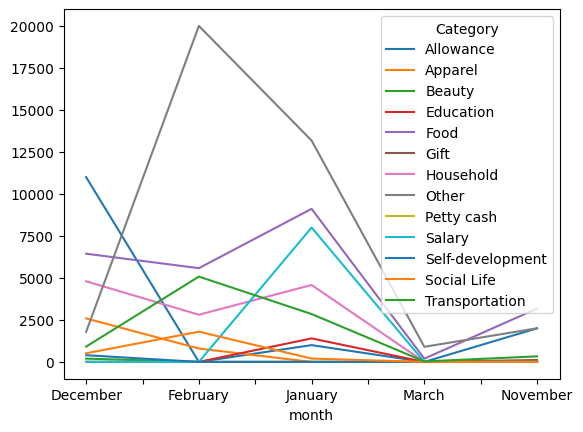

In [38]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

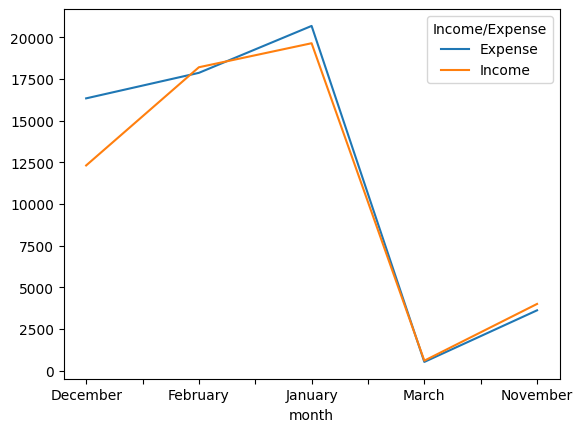

In [39]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='month'>

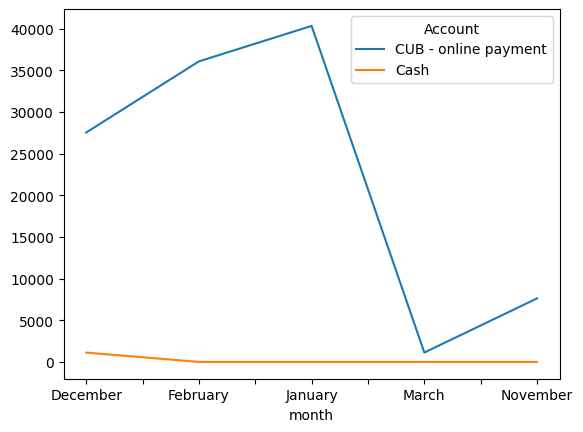

In [40]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()